# Code to simulate database
```python
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt
a = ['disease','no disease']
b = ['Female', 'male']
N = 100
var1= [random.choice(a) for x in range(N)]
var2= [random.choice(b) for x in range(N)]
var3 = [ np.random.weibull(1, N)]
var4 = [np.random.randint(24,60) for x in range(N)]
df = pd.DataFrame({'var1':var1, 'var2':var2, 'var3':var3[0], 'var4':var4}, )
df.to_excel('database.xls')
```

# Data Analysis 

## Load datasets
python uses pandas to handle data structures
```python
import pandas
```

## Load data with pandas 
```python
df = pd.read_excel('file name')
```



## EDA it is a first approximation to understand data 

* shape ( rows and columns)
* missing values

## Descriptive statistics 
```python
describe()
value_counts()
```

In [75]:
import pandas as pd
df = pd.read_excel('database.xls')

data was loaded in df object, you can check with the *head* method the first 5 rows.


In [76]:
df.head()

,Unnamed: 0,var1,var2,var3,var4
0,0,no disease,male,1.272876,51
1,1,no disease,Female,0.043885,25
2,2,disease,male,1.465319,25
3,3,disease,Female,1.533631,29
4,4,no disease,male,1.379643,49


the df has the attribute shape, to get a attribute not is necessary write parenthesis.
shape will return a tuple with (# rows,  # columns)

In [77]:
df.shape

(100, 5)

### * Test the method *tail()*

# Columns names
Sometimes it is needed change the name of variables, or it could interested in uses lowercases or uppercases.
```python
DataFrame.colums
```
Notice that is a attribute.

In [78]:
df.columns

Index(['Unnamed: 0', 'var1', 'var2', 'var3', 'var4'], dtype='object')

# frequencies 

to get frequencies we used the method over a column
```python
df['column'].value_counts()
```

In [79]:
feq = df['var2'].value_counts()

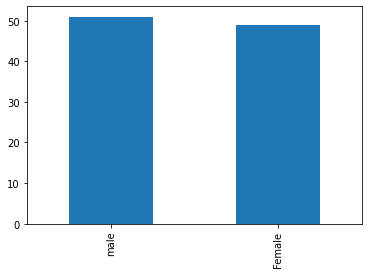

In [80]:
feq.plot.bar()

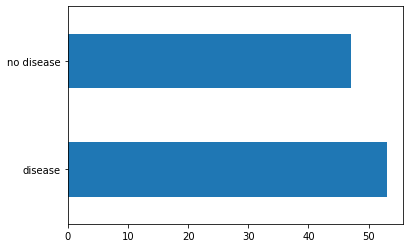

In [81]:
df['var1'].value_counts().plot(kind='barh')


# Why are important index?

In [82]:
import matplotlib.pyplot as plt
feq = pd.DataFrame(feq).reset_index()
feq

,index,var2
0,male,51
1,Female,49


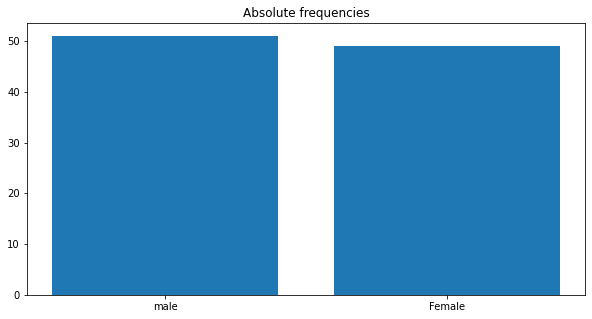

In [83]:
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(feq['index'], feq['var2'])
ax.set_title('Absolute frequencies')
plt.show()

# Parameters 
See in the official documentation as is written.
some methods of value_counts() are:
```python
normalize = False 
```
note that is a boolean value and by default is set as *False* this show us the relative frequencies.

### * Test the parameter ascending 

In [84]:
df['var2'].head()

0      male
1    Female
2      male
3    Female
4      male
Name: var2, dtype: object

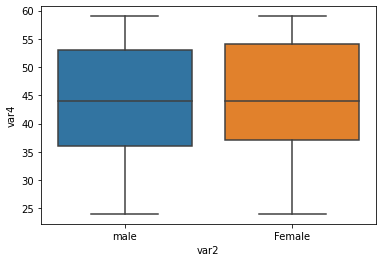

In [85]:
import seaborn as sns 
sns.boxplot(x='var2', y='var4', data=df)

In [86]:
df

,Unnamed: 0,var1,var2,var3,var4
0,0,no disease,male,1.272876,51
1,1,no disease,Female,0.043885,25
2,2,disease,male,1.465319,25
3,3,disease,Female,1.533631,29
4,4,no disease,male,1.379643,49
...,...,...,...,...,...
95,95,disease,male,0.337112,59
96,96,disease,Female,1.685909,48
97,97,no disease,male,0.744556,28
98,98,no disease,male,1.525077,50


# Describe method
this allow us to know some summary statistics of variables, mean, median, the min and max values 
and some quantiles.

In [87]:
df.describe()

,Unnamed: 0,var3,var4
count,100.000000,100.000000,100.000000
mean,49.500000,0.981960,43.800000
std,29.011492,0.895870,10.365054
min,0.000000,0.010935,24.000000
25%,24.750000,0.271075,37.000000
50%,49.500000,0.746530,44.000000
75%,74.250000,1.464230,53.250000
max,99.000000,3.866686,59.000000


# Filter 
sometimes we need a part of data, for instance see the describe of some features

In [91]:
df[df['var1']=='no disease'].head()

,Unnamed: 0,var1,var2,var3,var4
0,0,no disease,male,1.272876,51
1,1,no disease,Female,0.043885,25
4,4,no disease,male,1.379643,49
5,5,no disease,Female,0.918138,35
6,6,no disease,Female,0.687690,54


In [98]:
df[(df['var2']=='Female')  & (df['var1']=='disease')].head()

,Unnamed: 0,var1,var2,var3,var4
3,3,disease,Female,1.533631,29
11,11,disease,Female,1.789191,37
15,15,disease,Female,0.233826,38
18,18,disease,Female,0.757969,32
19,19,disease,Female,0.548287,39


# Groupby 
Make the before changes and return a dataset

In [102]:
df.groupby(by=['var1','var2'])['var4'].mean()

var1        var2  
disease     Female    40.291667
            male      42.758621
no disease  Female    46.960000
            male      45.409091
Name: var4, dtype: float64